In [48]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [49]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [50]:
# replace data frame with cleaned data frame
# fix data types - horsepower to int -, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
df = df.drop('car_name', axis=1)
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df = df.dropna()


Text(0.5, 1.0, 'Heatmap')

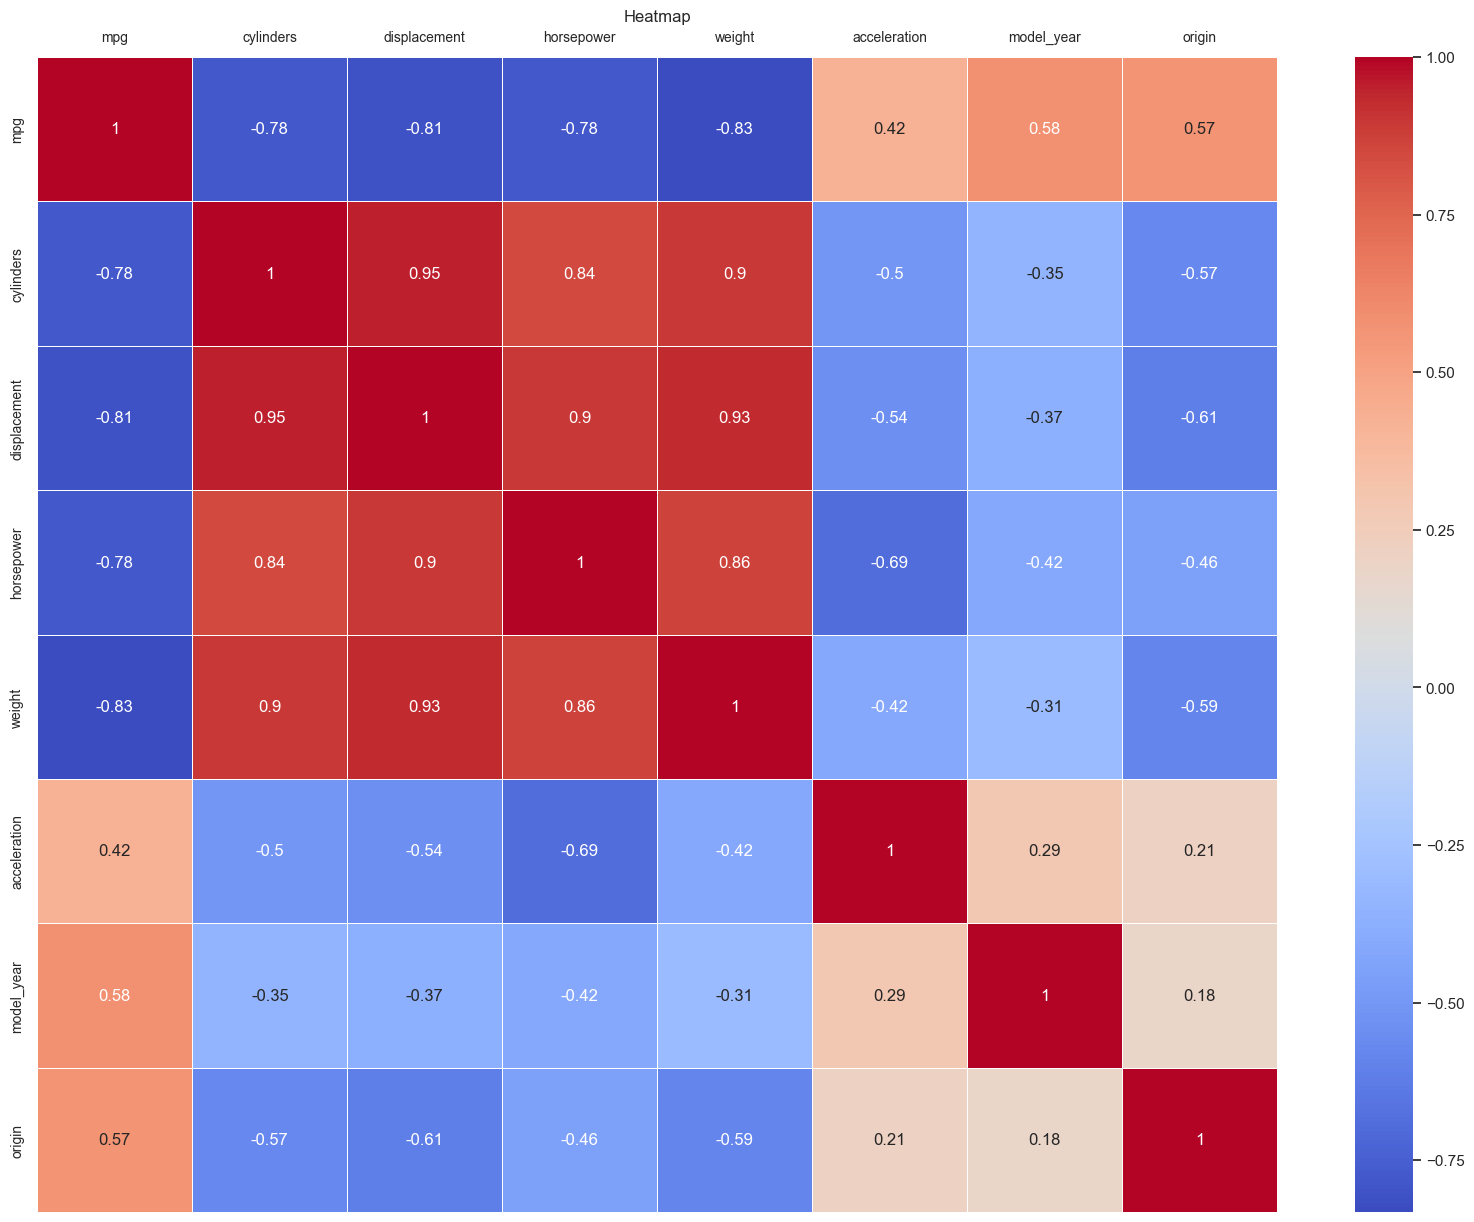

In [51]:
# heatmap of correlation matrix
df.corr()
correlation_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.title("Heatmap")

In [52]:
# split training data from test data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [53]:
# Initialize a list to store (R2, column_name) tuples
r2_values = []
# get names of all columns in the subset_data
column_names = df.columns
# iterate through all columns in the subset_data
for name in column_names:
    model = smf.ols(formula=f'mpg ~ {name}', data=X_train)
    res = model.fit()
    r2 = res.rsquared
    r2_values.append((r2, name))  # Store R2 and column name as a tuple

# Sort the list of tuples by R² in descending order
r2_values.sort(reverse=True, key=lambda x: x[0])

# Print the sorted R² values
for r2, name in r2_values:
    print(f"Column: {name}, R²: {r2}")


Column: mpg, R²: 1.0
Column: weight, R²: 0.6981745885310532
Column: displacement, R²: 0.6586626770902893
Column: horsepower, R²: 0.6121193728863612
Column: cylinders, R²: 0.6092657121665905
Column: model_year, R²: 0.3486357567498941
Column: origin, R²: 0.3238336873127964
Column: acceleration, R²: 0.16978383928843077


In [54]:
#fit polynomial regression up to N=10 and report 𝑅2. Which polynomial degree gives the best result? 
results = []
for N in range(1, 11):  # Loop through degrees 1 to 10
    # Create formula string dynamically
    formula = "mpg ~ " + " + ".join([f"np.power(horsepower, {i})" for i in range(1, N + 1)])
    
    # Fit the model
    model = smf.ols(formula=formula, data=X_train).fit()
    
    # Store the degree and R^2 value
    results.append((N, model.rsquared))

# Print the results
print(results)

[(1, np.float64(0.6121193728863612)), (2, np.float64(0.6956467257334956)), (3, np.float64(0.6966106861780073)), (4, np.float64(0.696889557209586)), (5, np.float64(0.7045308291527401)), (6, np.float64(0.7037982952237802)), (7, np.float64(0.7043975318048221)), (8, np.float64(0.6516726801656645)), (9, np.float64(0.4428185439885819)), (10, np.float64(-0.04244313142643663))]


In [64]:
# Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value
df['weight_norm'] = df['weight']/df['weight'].mean()
for N in range(1, 21):  # Loop through degrees 1 to 20
    # Create formula string dynamically
    formula = "mpg ~ " + " + ".join([f"np.power(horsepower, {i})" for i in range(1, N + 1)])
    
    # Fit the model
    model = smf.ols(formula=formula, data=X_train).fit()
    print(f"""
    
    Degree: {N}, R²: {model.rsquared}

        {model.summary()}""")


    
    Degree: 1, R²: 0.6121193728863612

                                    OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     490.8
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           6.36e-66
Time:                        18:54:43   Log-Likelihood:                -944.56
No. Observations:                 313   AIC:                             1893.
Df Residuals:                     311   BIC:                             1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------